In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv("Crop_Recommendation.csv")
data.head()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
pd.unique(data["Crop"])

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [5]:
pd.value_counts(data["Crop"]) #to check data imbalance

C:\Users\ABRAAR\AppData\Local\Temp\ipykernel_22252\876319702.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["Crop"]) #to check data imbalance


Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64

No imbalance

In [6]:
X,Y= data.iloc[:,:-1],data["Crop"]  #put everything in X except last column which is output and put Crop in Y
X.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [7]:
X.reset_index(drop=True)
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


<Axes: >

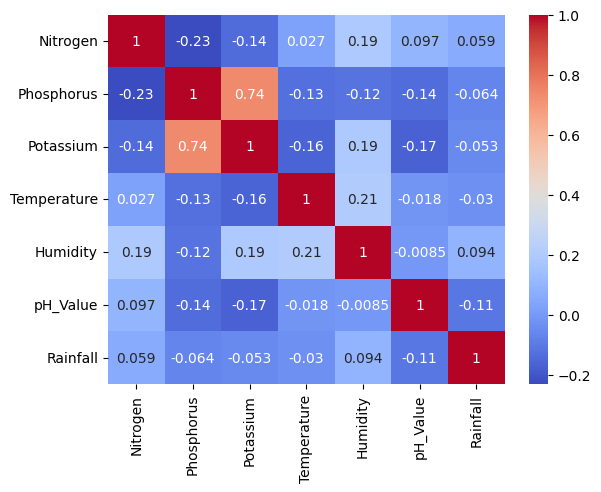

In [8]:
X_corr= X.corr()
sns.heatmap(X_corr, annot=True,cmap="coolwarm")

As you can see potassium and phosphorous are highly colinear 0.74, so we need to drop one of them

In [39]:
data_corr= data.corr()
sns.heatmap(data_corr, annot=True,cmap="coolwarm")

ValueError: could not convert string to float: 'Rice'

In [9]:
X=X.drop(columns=["Phosphorus"])
X.head()

,Nitrogen,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,43,20.879744,82.002744,6.502985,202.935536
1,85,41,21.770462,80.319644,7.038096,226.655537
2,60,44,23.004459,82.320763,7.840207,263.964248
3,74,40,26.491096,80.158363,6.980401,242.864034
4,78,42,20.130175,81.604873,7.628473,262.717340


In [10]:
scaler= StandardScaler()
scaled_value= scaler.fit_transform(X.values)
x_scaled= pd.DataFrame(scaled_value, columns=X.columns)
x_scaled.head()

,Nitrogen,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,1.068797,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
x_train,x_test,y_train,y_test= train_test_split(x_scaled,Y, test_size=0.2,random_state=42)

params_grid={
    "criterion": ["gini", "entropy"],
    "max_depth": [None,5,10],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

clf= DecisionTreeClassifier()
grid_search= GridSearchCV(estimator=clf, param_grid=params_grid, cv=5, scoring="accuracy")
grid_search.fit(x_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and 

In [12]:
results= pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016107,0.002592,0.004033,0.001916,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.971591,0.968750,0.980114,0.982955,0.980114,0.976705,0.005509,4
1,0.012801,0.002732,0.003476,0.001764,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.968750,0.965909,0.977273,0.982955,0.988636,0.976705,0.008504,4
2,0.012166,0.000639,0.003254,0.000810,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.968750,0.977273,0.968750,0.982955,0.988636,0.977273,0.007832,1
3,0.014624,0.001102,0.003156,0.000492,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.968750,0.980114,0.968750,0.982955,0.982955,0.976705,0.006577,8
4,0.013987,0.001730,0.004003,0.002498,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.960227,0.977273,0.977273,0.982955,0.982955,0.976136,0.008351,9


In [13]:
best_params=grid_search.best_params_
print("Best hyperparameters:", best_params)
best_clf=DecisionTreeClassifier(**best_params)
best_clf.fit(x_train,y_train)
y_pred= best_clf.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
print("accuracy score:", accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
accuracy score: 0.9659090909090909


In [14]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

encoder= LabelEncoder()
y_encoded= encoder.fit_transform(Y) #xg works only on encoded output
x_trainxgb,x_testxgb,y_trainxgb,y_testxgb= train_test_split(x_scaled,y_encoded, test_size=0.2, random_state=42)
xg_clf= XGBClassifier()

params_grid1={
    "max_depth":[3,5,7],
    "learning_rate": [0.1,0.01,0.001],
    "n_estimators":[100,200,300]
}

grid_search1= GridSearchCV(estimator=xg_clf, param_grid=params_grid1,cv=5, scoring="accuracy")
grid_search1.fit(x_trainxgb,y_trainxgb)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.01, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displ

In [15]:
results1=pd.DataFrame(grid_search1.cv_results_)
results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.287671,1.334138,0.010696,0.002437,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.980114,0.980114,0.977273,0.994318,0.994318,0.985227,0.007495,1
1,9.602982,1.241205,0.020469,0.006905,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.977273,0.971591,0.977273,0.997159,0.994318,0.983523,0.010227,3
2,8.206146,1.777828,0.017232,0.001813,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.977273,0.971591,0.977273,1.000000,0.994318,0.984091,0.011017,2
3,3.063937,0.517146,0.011263,0.001547,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.974432,0.971591,0.974432,0.997159,0.994318,0.982386,0.010988,5
4,5.128253,0.777701,0.013979,0.001611,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.974432,0.968750,0.974432,0.997159,0.994318,0.981818,0.011589,6


In [33]:
best_params1= grid_search1.best_params_
print("best Hyperparameter:", best_params1)
best_xg_clf= XGBClassifier(**best_params1)
best_xg_clf.fit(x_trainxgb,y_trainxgb)
y_predXG=best_xg_clf.predict(x_testxgb)
accuracy_xg= accuracy_score(y_testxgb,y_predXG)
print("accuracy:", accuracy_xg)

best Hyperparameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
accuracy: 0.9886363636363636


In [49]:

test_samples= [[
 80,52,27.87317436,91.14849627,6.484799661,24.05207925,
]]


test_samples_scaled = scaler.transform(test_samples)

pred_encoded = best_xg_clf.predict(test_samples_scaled)
pred_crop = encoder.inverse_transform(pred_encoded)

probs = best_xg_clf.predict_proba(test_samples_scaled)
for crop, p in zip(encoder.classes_, probs[0]):
    print(crop, round(p, 3))



print("Predicted Crop:", pred_crop[0])





Apple 0.285
Banana 0.0
Blackgram 0.0
ChickPea 0.0
Coconut 0.0
Coffee 0.0
Cotton 0.001
Grapes 0.001
Jute 0.0
KidneyBeans 0.0
Lentil 0.0
Maize 0.0
Mango 0.0
MothBeans 0.0
MungBean 0.0
Muskmelon 0.696
Orange 0.0
Papaya 0.014
PigeonPeas 0.0
Pomegranate 0.0
Rice 0.0
Watermelon 0.001
Predicted Crop: Muskmelon


In [52]:
pred_crop1= best_clf.predict(test_samples_scaled)
print(pred_crop1) #decision tree

['Muskmelon']


c:\Users\ABRAAR\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
from sklearn.metrics import classification_report


# print(confusion_matrix(y_testxgb, y_pred))
print(classification_report(y_testxgb, y_pred, target_names=encoder.classes_))


              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      0.96      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       0.94      1.00      0.97        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.96      1.00      0.98        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       0.95      1.00      0.97        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        14
      Papaya       1.00    

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid2 = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_search2 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid2,
    cv=5,
    scoring="f1_macro",   # MUCH better than accuracy
    n_jobs=-1,
    verbose=2
)

grid_search2.fit(x_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each

In [57]:
# best_rf= grid_search2.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [59]:
best_rf= RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(x_train,y_train)
y_predRF=best_rf.predict(x_test)
accuracy_rf= accuracy_score(y_test,y_predRF)
print("accuracy:", accuracy_rf)

accuracy: 0.9863636363636363


In [72]:
test_sample3 = [[
  90,55,27.96236771,84.15403614,5.644486582,97.55986676,
]]

test_sample3_scaled= scaler.transform(test_sample3)
pred1 = best_rf.predict(test_sample3_scaled)

probs1 = best_rf.predict_proba(test_sample3_scaled)

print("Predicted crop:", pred1[0])

for crop, p in zip(encoder.classes_, probs1[0]):
    print(crop, round(p, 3))




Predicted crop: Apple
Apple 0.438
Banana 0.099
Blackgram 0.0
ChickPea 0.0
Coconut 0.002
Coffee 0.01
Cotton 0.0
Grapes 0.072
Jute 0.006
KidneyBeans 0.0
Lentil 0.0
Maize 0.0
Mango 0.0
MothBeans 0.0
MungBean 0.0
Muskmelon 0.03
Orange 0.018
Papaya 0.29
PigeonPeas 0.0
Pomegranate 0.0
Rice 0.035
Watermelon 0.0


c:\Users\ABRAAR\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\ABRAAR\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
